In [1]:
import numpy as np
import pandas as pd
import xlrd
import matplotlib.pyplot as plt

#%matplotlib inline


In [2]:
wb = xlrd.open_workbook('C:/Users/goeld/OneDrive/Desktop/Machine Learning/SCOOP-Rating-Performance.xls')

In [3]:
ws = wb.sheet_by_index(0)

ws.nrows

3773

In [4]:
ipo_list = []

for i in range(36, ws.nrows):
    if isinstance(ws.row(i)[0].value, float):
        ipo_list.append([x.value for x in ws.row(i)])
    
    else:
        print(i, ws.row(i))
            

36 [empty:'', number:2020.0, empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
242 [empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
243 [empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
244 [text:'Trade', empty:'', empty:'', text:'Lead/Joint-Lead', text:'Offer', text:'Opening', text:'1st Day', text:'1st Day', text:'$ Change', text:'$ Change', text:'Star', empty:'']
245 [text:'Date', text:'Issuer', text:'Symbol', text:' Managers', text:'Price', text:'Price', text:'Close', text:'% Px Chng ', text:'Opening', text:'Close', text:'Ratings', text:'Performed']
246 [empty:'', number:2019.0, empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'']
468 [empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', empty:'', emp

In [5]:
len(ipo_list)

df = pd.DataFrame(ipo_list)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,43847.0,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.089286,0.75,-1.25,2.0,
1,43847.0,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.057273,0.03,0.63,1.0,
2,43847.0,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0.0,0.00,0.00,1.0,
3,43847.0,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.039231,0.85,0.51,1.0,
4,43854.0,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.045,0.52,0.45,1.0,


In [6]:
df.columns = ['Date', 'Company', 'Ticker', 'Managers', \
               'Offer Price', 'Opening Price', '1st Day Close', \
                   '1st Day % Chg', '$ Chg Open', '$ Chg Close', \
                       'Star Rating', 'Performed']

df.head(10)

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed
0,43847.0,I-Mab,IMAB,Jefferies/ CICC,14.0,14.75,12.75,-0.089286,0.75,-1.25,2.0,
1,43847.0,LIZHI,LIZI,Credit Suisse/ Citigroup,11.0,11.03,11.63,0.057273,0.03,0.63,1.0,
2,43847.0,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.5,13.50,13.50,0.0,0.00,0.00,1.0,
3,43847.0,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.0,13.85,13.51,0.039231,0.85,0.51,1.0,
4,43854.0,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.0,10.52,10.45,0.045,0.52,0.45,1.0,
5,43854.0,SCVX Corp.,SCVXU,Credit Suisse,10.0,10.30,10.32,0.032,0.30,0.32,1.0,
6,43858.0,AnPac Bio-Medical Science,ANPC,WestPark Capital,12.0,12.00,11.25,-0.0625,0.00,-0.75,1.0,
7,43859.0,Annovis Bio,ANVS,ThinkEquity (a division of Fordham Financial M...,6.0,6.63,9.59,0.598333,0.63,3.59,1.0,Missed
8,43859.0,Black Diamond Therapeutics,BDTX,J.P. Morgan/ Jefferies/ Cowen,19.0,33.00,39.48,1.077895,14.00,20.48,3.0,
9,43861.0,1Life Healthcare,OWEM,J.P. Morgan/ Morgan Stanley,14.0,18.00,22.07,0.576429,4.00,8.07,2.0,


In [7]:
def to_date(x):
    return xlrd.xldate.xldate_as_datetime(x, wb.datemode)

df['Date'] = df['Date'].apply(to_date)

df

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed
0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,14.00,14.7500,12.7500,-0.089286,0.7500,-1.2500,2.0,
1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.00,11.0300,11.6300,0.057273,0.0300,0.6300,1.0,
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.50,13.5000,13.5000,0.0,0.0000,0.0000,1.0,
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.00,13.8500,13.5100,0.039231,0.8500,0.5100,1.0,
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.00,10.5200,10.4500,0.045,0.5200,0.4500,1.0,
...,...,...,...,...,...,...,...,...,...,...,...,...
3627,2000-12-08,Specialty Laboratories,SP,Merrill Lynch,16.00,21.9375,23.3125,0.457031,5.9375,7.3125,3.0,
3628,2000-12-08,W.P. Stewart & Co.,WPL,Goldman Sachs/Lazard,20.00,22.0625,24.5000,0.225,2.0625,4.5000,2.0,
3629,2000-12-11,Gemplus,GEMP,Credit Suisse First Boston,10.69,12.0000,13.3750,0.251169,1.3100,2.6850,1.0,
3630,2000-12-12,GenVec,GNVC,J.P. Morgan,9.50,10.5625,9.8750,0.039474,1.0625,0.3750,2.0,


In [8]:
df['Year'], df['Month'], df['Day'], df['Day of Week'] = \
df['Date'].dt.year, df['Date'].dt.month, df['Date'].dt.day, df['Date'].dt.weekday
    
df    

,Date,Company,Ticker,Managers,Offer Price,Opening Price,1st Day Close,1st Day % Chg,$ Chg Open,$ Chg Close,Star Rating,Performed,Year,Month,Day,Day of Week
0,2020-01-17,I-Mab,IMAB,Jefferies/ CICC,14.00,14.7500,12.7500,-0.089286,0.7500,-1.2500,2.0,,2020,1,17,4
1,2020-01-17,LIZHI,LIZI,Credit Suisse/ Citigroup,11.00,11.0300,11.6300,0.057273,0.0300,0.6300,1.0,,2020,1,17,4
2,2020-01-17,Phoenix Tree Holdings Ltd.,DNK,Citigroup/ Credit Suisse/ J.P. Morgan,13.50,13.5000,13.5000,0.0,0.0000,0.0000,1.0,,2020,1,17,4
3,2020-01-17,Velocity Financial,VEL,Wells Fargo Securities/ Citigroup/ JMP Securities,13.00,13.8500,13.5100,0.039231,0.8500,0.5100,1.0,,2020,1,17,4
4,2020-01-24,Gores Holdings IV,GHIVU,Deutsche Bank Securities,10.00,10.5200,10.4500,0.045,0.5200,0.4500,1.0,,2020,1,24,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3627,2000-12-08,Specialty Laboratories,SP,Merrill Lynch,16.00,21.9375,23.3125,0.457031,5.9375,7.3125,3.0,,2000,12,8,4
3628,2000-12-08,W.P. Stewart & Co.,WPL,Goldman Sachs/Lazard,20.00,22.0625,24.5000,0.225,2.0625,4.5000,2.0,,2000,12,8,4
3629,2000-12-11,Gemplus,GEMP,Credit Suisse First Boston,10.69,12.0000,13.3750,0.251169,1.3100,2.6850,1.0,,2000,12,11,0
3630,2000-12-12,GenVec,GNVC,J.P. Morgan,9.50,10.5625,9.8750,0.039474,1.0625,0.3750,2.0,,2000,12,12,1


In [9]:
by_year_cnt = df.groupby('Year')[['Ticker']].count()

by_year_cnt

,Ticker
Year,
2000,237
2001,94
2002,82
2003,80
2004,233
2005,226
2006,237
2007,256
2008,47


In [10]:
# Eliminating penny stocks among the present dataset

df.drop(df[df['Offer Price'] < 5].index, inplace= True)

df.reset_index(drop=True, inplace= True)

df['1st Day % Chg'] = df['1st Day % Chg'].astype(float)

df.dtypes

Date             datetime64[ns]
Company                  object
Ticker                   object
Managers                 object
Offer Price             float64
Opening Price           float64
1st Day Close           float64
1st Day % Chg           float64
$ Chg Open              float64
$ Chg Close             float64
Star Rating              object
Performed                object
Year                      int32
Month                     int32
Day                       int32
Day of Week               int32
dtype: object

Text(0.5, 1.02, 'IPO Count by Year')

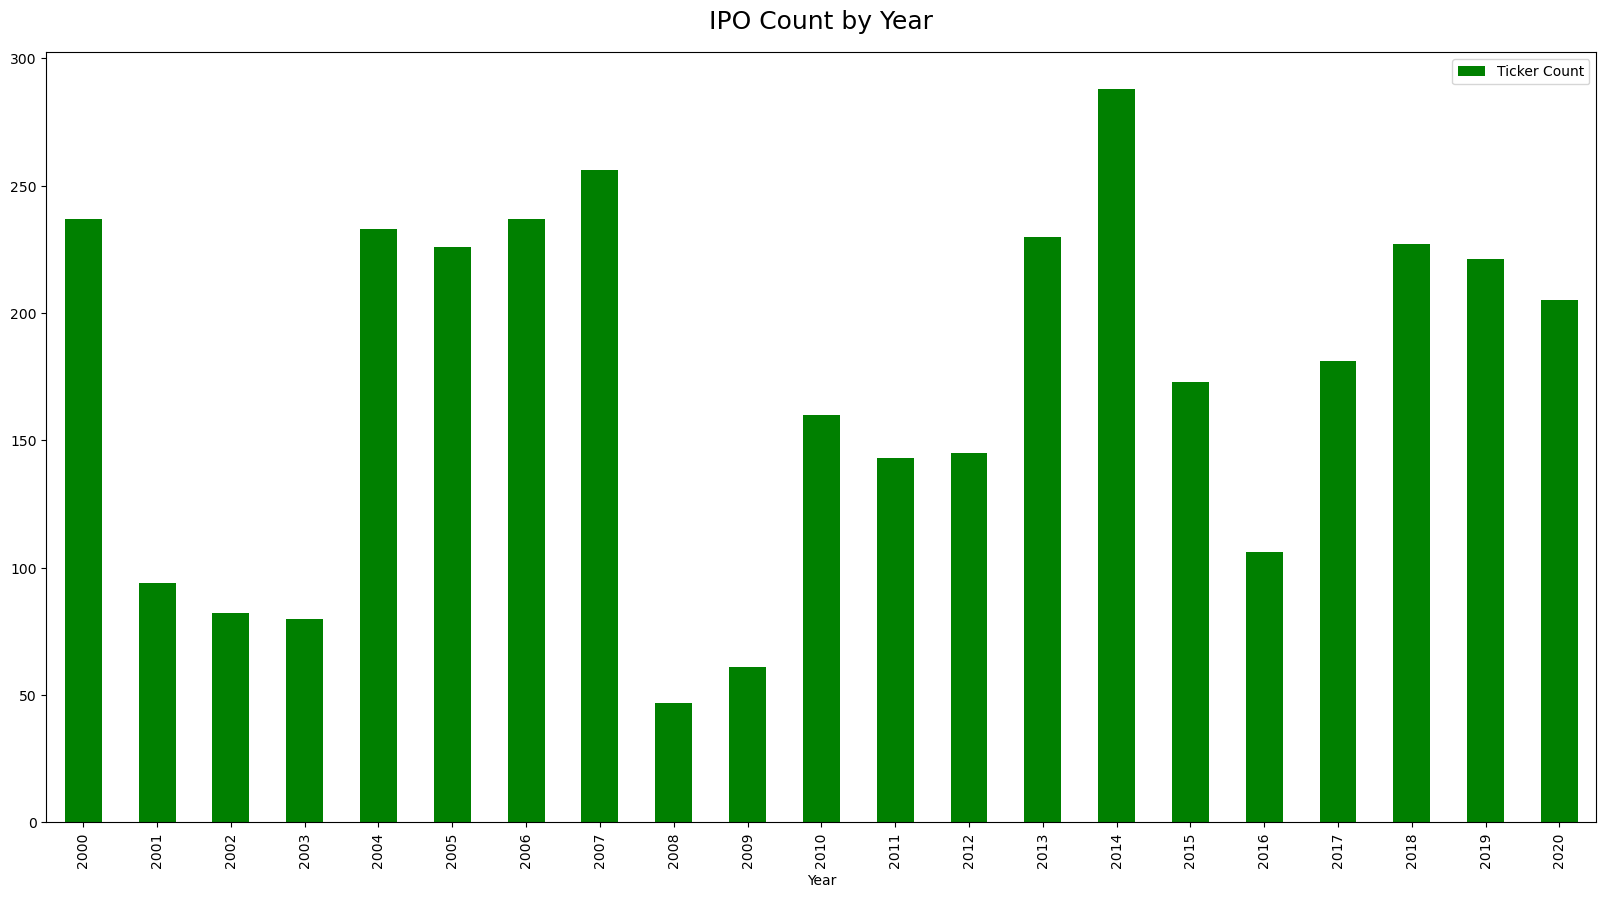

In [11]:
# Plotting the dataset now, using the matplotlib library

fig, ax = plt.subplots(figsize=(20, 10))

by_year_cnt.plot(kind= 'bar', ax = ax, color = 'green')

ax.legend(['Ticker Count'])

ax.set_title('IPO Count by Year', fontdict = {'size':18}, y = 1.02)

In [12]:
summary_by_year = df.groupby("Year")["1st Day % Chg"].describe()

summary_by_year



,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2000,237.0,0.355621,0.557065,-0.269231,0.004464,0.162500,0.470052,2.775000
2001,93.0,0.130180,0.160606,-0.140625,0.011538,0.088542,0.229167,0.766667
2002,82.0,0.072315,0.141903,-0.330769,0.000000,0.045959,0.135866,0.666667
2003,79.0,0.120958,0.164613,-0.155455,0.002857,0.074286,0.230264,0.885556
2004,233.0,0.107347,0.165334,-0.142500,0.000000,0.052083,0.169231,1.036364
2005,226.0,0.099110,0.274405,-0.164000,0.000000,0.025357,0.143803,3.538519
2006,236.0,0.099694,0.176282,-0.295455,0.000000,0.041652,0.150852,1.254068
2007,256.0,0.115215,0.206049,-0.269091,0.000000,0.033571,0.179853,0.972222
2008,47.0,0.023182,0.134953,-0.199200,-0.034857,0.000000,0.028873,0.575000


Text(0.5, 1.02, 'Mean First Day Percentage Change by Year')

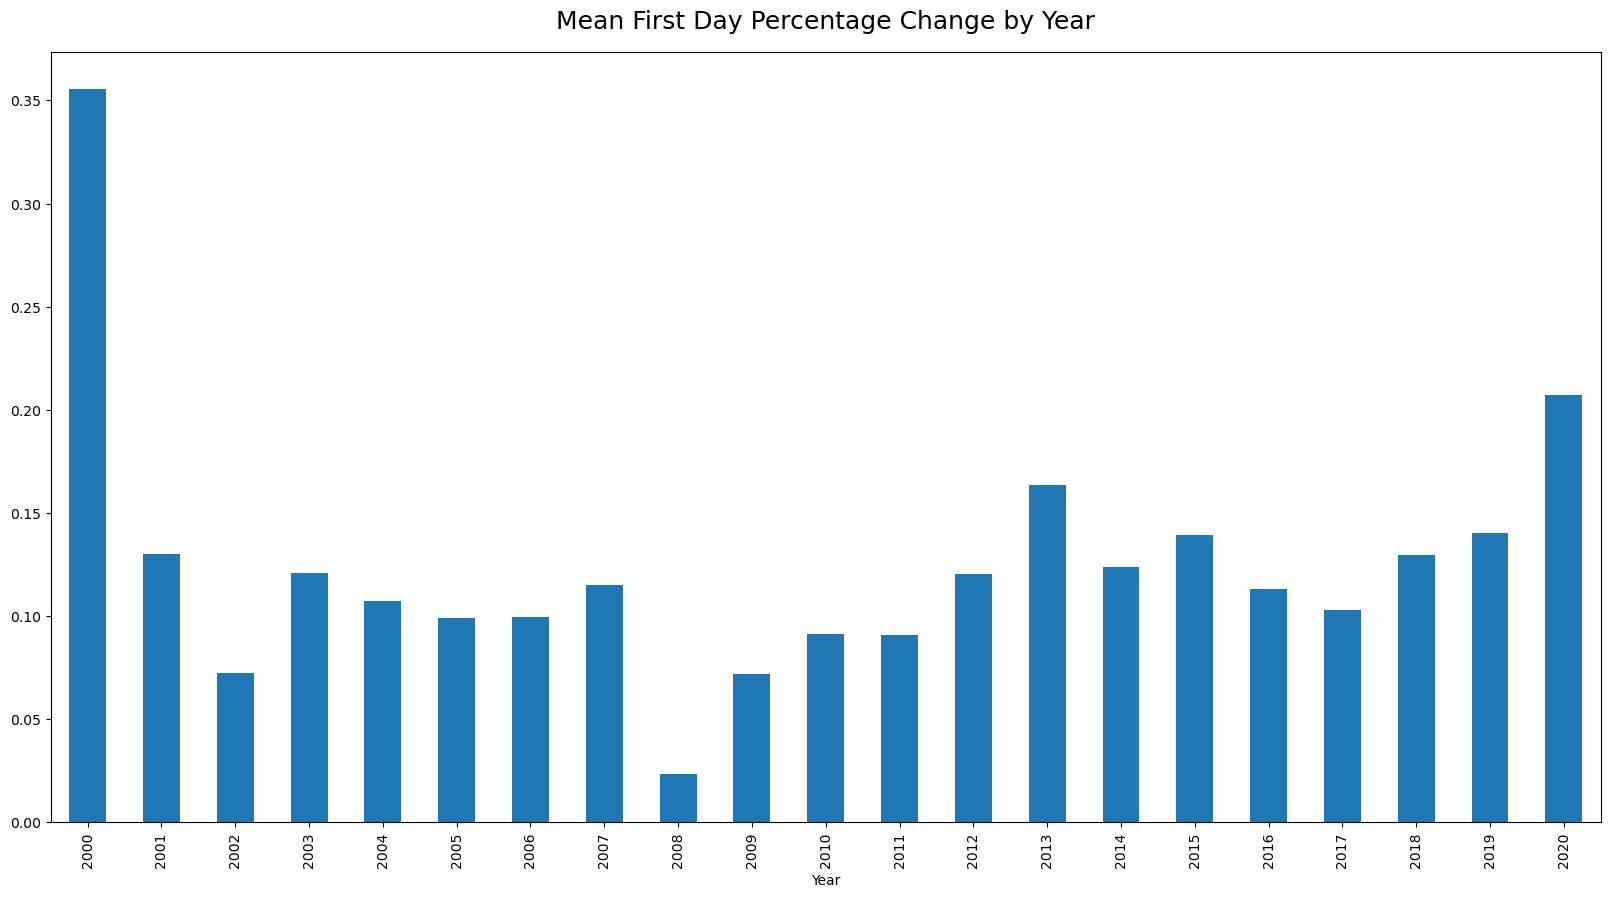

In [13]:
fig, ax = plt.subplots(figsize=(20, 10))

summary_by_year['mean'].plot(kind= 'bar', ax = ax)

ax.set_title('Mean First Day Percentage Change by Year', fontdict = {'size':18}, y = 1.02)

In [14]:
df['1st Day open to close % Chg'] = (df['1st Day Close'] - df['Opening Price']) / df['Opening Price']

df['1st Day open to close % Chg'].describe()



count    3602.000000
mean        0.013316
std         0.115647
min        -0.492812
25%        -0.028618
50%         0.000000
75%         0.038282
max         2.173653
Name: 1st Day open to close % Chg, dtype: float64

Text(0.5, 1.02, 'Mean First Day Open to Close % Change by Year')

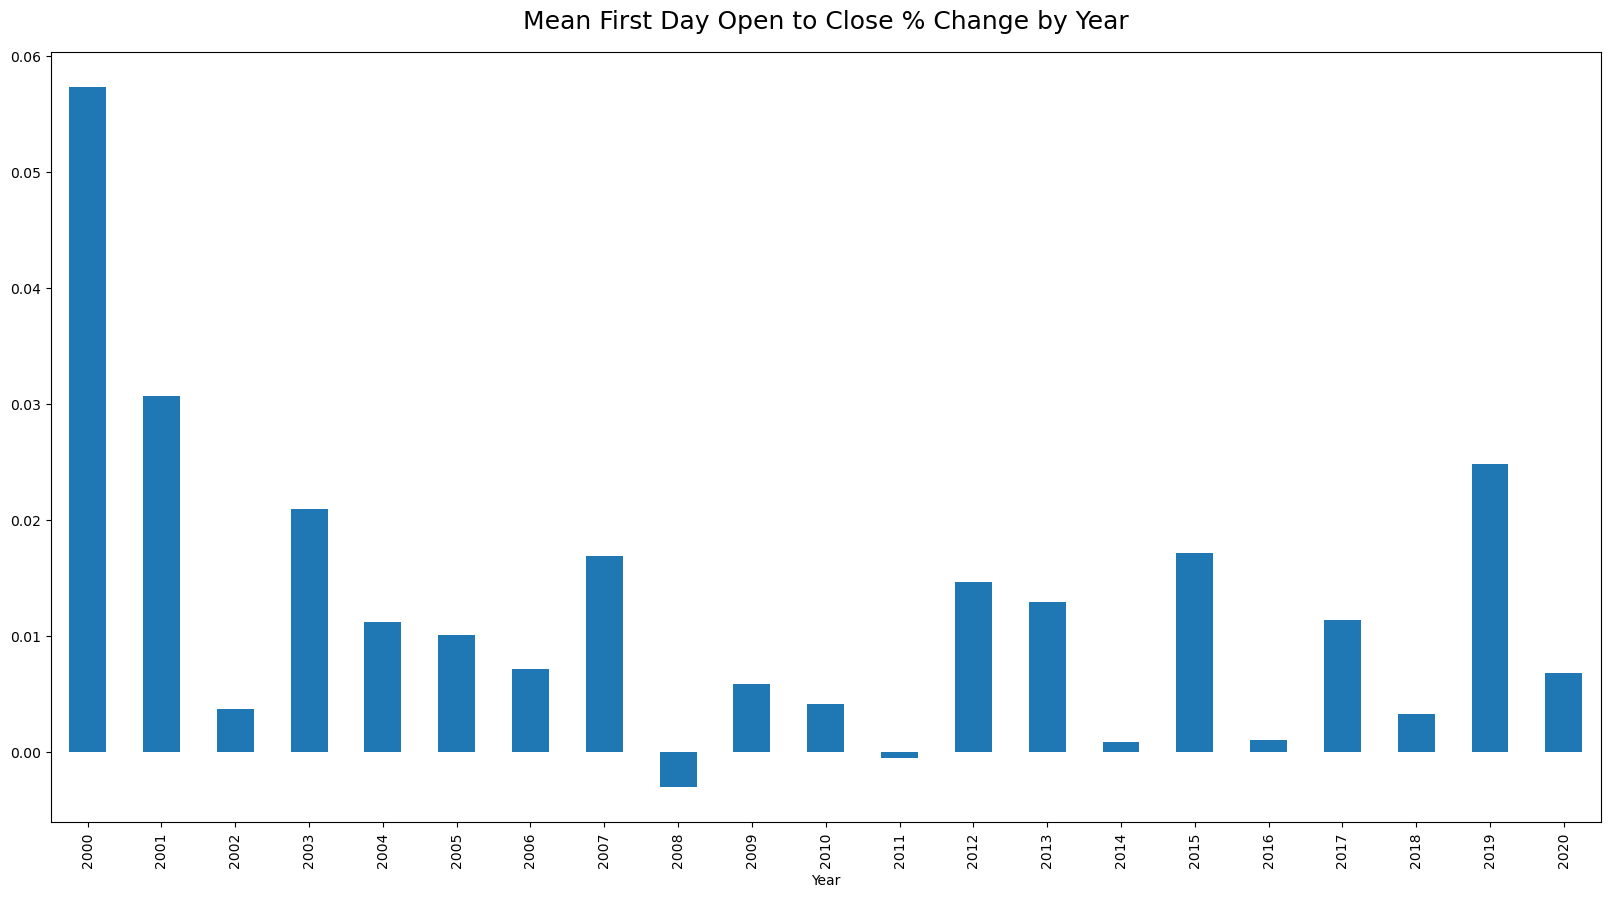

In [15]:
fig, ax = plt.subplots(figsize=(20 , 10))

df.groupby('Year')['1st Day open to close % Chg'].mean().plot(kind='bar', ax=ax)

ax.set_title('Mean First Day Open to Close % Change by Year', 
             
             fontdict={'size': 18}, y=1.02)

In [16]:
df['1st Day open to close % Chg'] = (df['1st Day Close'] - df['Opening Price'])

df[df['Year'] ==2020]['1st Day open to close % Chg'].describe()

count    204.000000
mean       0.170309
std        3.249581
min       -8.900000
25%       -0.350000
50%        0.000000
75%        0.165000
max       20.590000
Name: 1st Day open to close % Chg, dtype: float64

In [17]:
df['Opening Gap % Chg'] = (df['Opening Price'] - df['Offer Price']) / df['Offer Price']

def get_mgr_count(x):
    return len(x.split('/'))


df['Mgr Count'] = df['Managers'].apply(get_mgr_count)

df.groupby('Mgr Count')['1st Day open to close % Chg'].mean().to_frame().style.bar(align= 'mid', color= ['red', 'lightgreen'] )

    

,1st Day open to close % Chg
Mgr Count,
1,0.293678
2,0.276348
3,0.209083
4,0.278996
5,0.096087
6,-0.058333
7,0.052500
8,0.057273
9,-0.683750


In [18]:
df['Lead Mgr'] = df['Managers'].apply(lambda x: x.split('/')[0])

df['Lead Mgr'].unique()



array(['Jefferies', 'Credit Suisse', 'Citigroup',
       'Wells Fargo Securities', 'Deutsche Bank Securities',
       'WestPark Capital',
       'ThinkEquity (a division of Fordham Financial Management )',
       'J.P. Morgan', 'Goldman Sachs', 'EarlyBirdCapital',
       'Morgan Stanley', 'Barclays', 'Raymond James', 'Stephens',
       'Imperial Capital', 'Maxim Group LLC', 'Alexander Capital',
       'Chardan', 'I-Bankers Securities', 'JPMorgan', 'Benchmark Company',
       'Cantor', 'BofA Securities', 'Roth Capital Partners',
       'Boustead Securities', 'Nomura', 'B. Riley FBR', 'Cowen',
       'Goldman Sachs (Asia)',
       'ThinkEquity (a division of Fordham Financial Management) ',
       'Piper Sandler', 'AMTD', 'UBS Investment Bank', ' AMTD', 'BTIG',
       'The Benchmark Company', 'Ladenburg Thalmann',
       'ThinkEquity (a division of Fordham Financial Management)',
       'Stifel', 'Credit Suisse. Citigroup', ' I-Bankers Securities',
       'Maxim Group', 'Mizuho Securitie

In [22]:
from patsy import dmatrix

y = df['1st Day open to close % Chg'].apply(lambda x: 1 if x> 0.25 else 0)

X = dmatrix("Q('Opening Gap % Chg') + C(Q('Month'), Treatment) + C(Q('Day of Week'), Treatment)\
+ Q('Mgr Count') + Q('Lead Mgr') + Q('Offer Price') + C(Q('Star Rating'), Treatment)", df, return_type="dataframe")

In [24]:
from sklearn.linear_model import  LogisticRegression

X_train, X_test, y_train, y_test = X[:-200], X[-200:], y[:-200], y[-200:]

clf = LogisticRegression(max_iter= 500)

clf.fit(X_train, y_train)



LogisticRegression(max_iter=500)

In [25]:
y_hat = clf.predict(X_test)

y_true = y_test

pdf = pd.DataFrame({'y_true': y_true, 'y_hat': y_hat})

pdf['correct'] = pdf.apply(lambda x: 1 if x['y_true'] == x['y_hat'] else 0, axis= 1)

print(pdf)

      y_true  y_hat  correct
3402       1      1        1
3403       0      1        0
3404       0      0        1
3405       0      0        1
3406       0      0        1
...      ...    ...      ...
3597       1      1        1
3598       1      0        0
3599       1      0        0
3600       0      1        0
3601       1      0        0

[200 rows x 3 columns]


In [28]:
pdf['y_true'].value_counts(normalize= True)

results = pd.merge(df[['1st Day open to close % Chg']], pdf, left_index= True, right_index= True)

results


,1st Day open to close % Chg,y_true,y_hat,correct
3402,9.125000,1,1,1
3403,-15.875000,0,1,0
3404,-1.343750,0,0,1
3405,-2.062500,0,0,1
3406,-1.234375,0,0,1
...,...,...,...,...
3597,1.375000,1,1,1
3598,2.437500,1,0,0
3599,1.375000,1,0,0
3600,-0.687500,0,1,0


In [32]:
results['1st Day open to close % Chg'].describe()

#ipo buys

results[results['y_hat'] == 1]['1st Day open to close % Chg'].sum()

75.390625

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

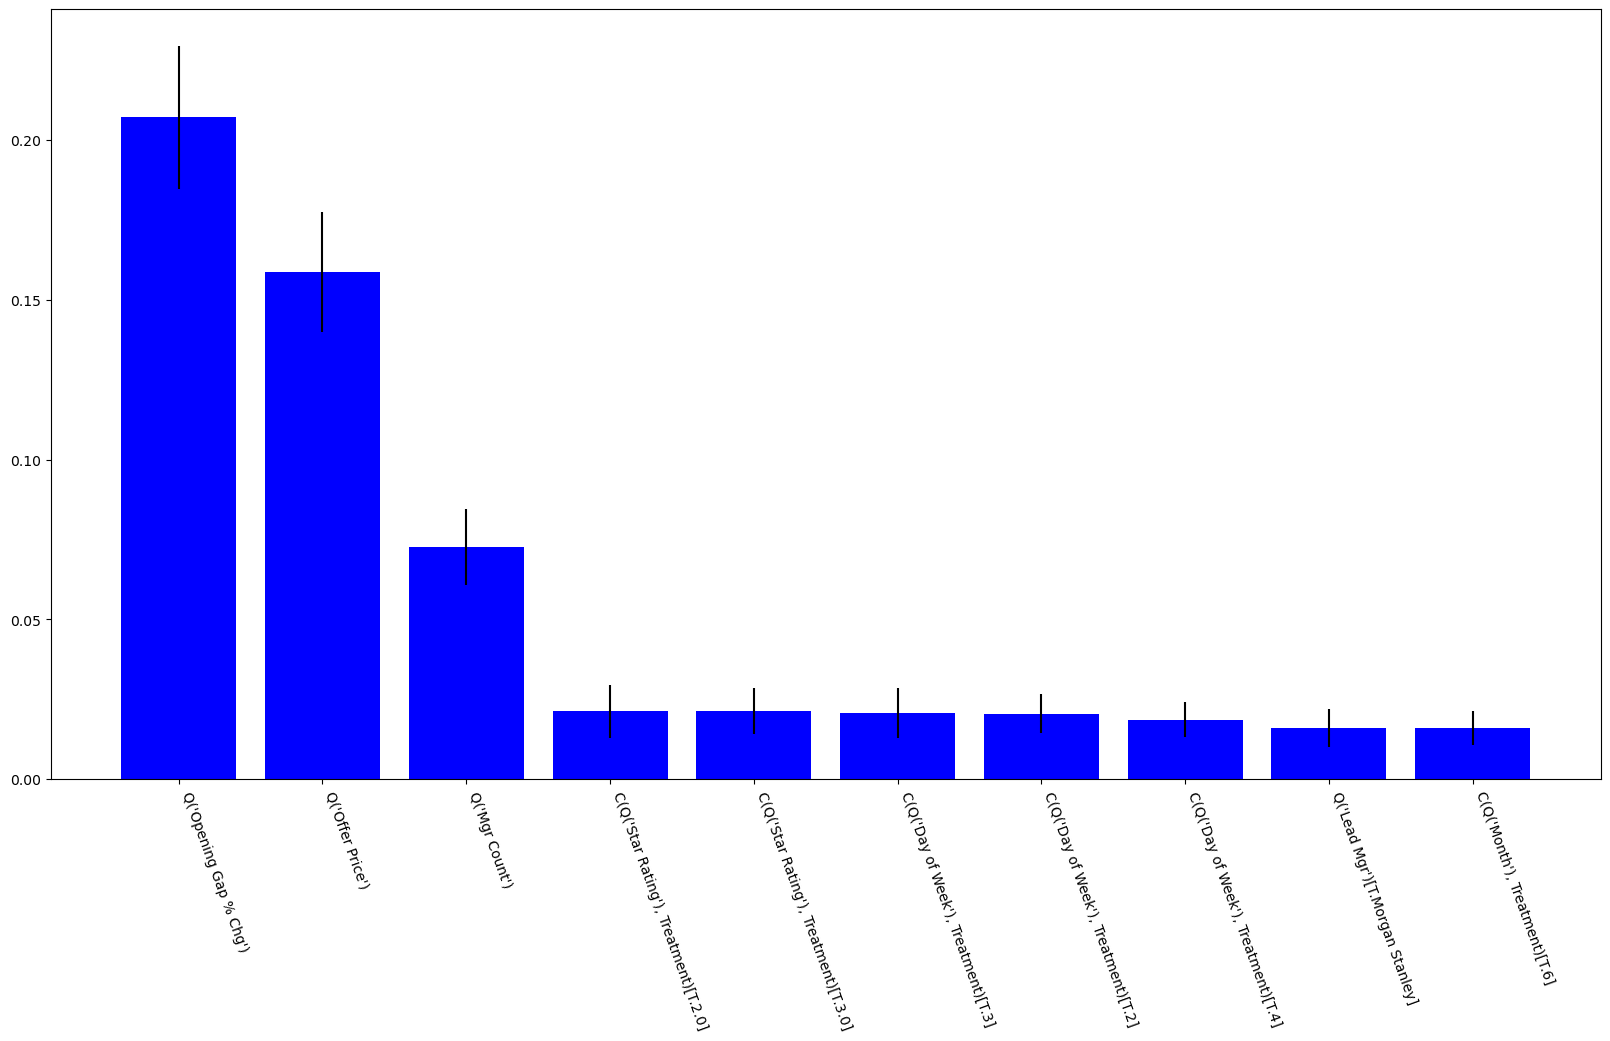

In [33]:
# RANDOM FOREST CLASSIFIER MODEL

from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=1000)

clf_rf.fit(X_train, y_train)

f_importances = clf_rf.feature_importances_

f_names = X_train.columns

f_std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis = 0)

zz = zip(f_importances, f_names, f_std)

zzs = sorted(zz, key = lambda x: x[0], reverse = True)

n_features = 10

imps = [x[0] for x in zzs[:n_features]]

labels = [x[1] for x in zzs[:n_features]]

errs = [x[2] for x in zzs[:n_features]]

fig, ax = plt.subplots(figsize=(20, 10))

ax.bar(range(n_features), imps, color = 'blue', yerr = errs)

plt.xticks(range(n_features), labels)

plt.setp(ax.xaxis.get_majorticklabels(), rotation = -70, ha = "left")

